## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Import Data

In [4]:
realestate = pd.read_csv("realestate.csv")

In [5]:
realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Goal: Using the above data, build a model to accurately predict housing prices. This variable is conveniently labeled Y house price of unit area. Use X variables numbered 2-6 to determine housing prices. When completed, if desired, you should be able to take completely new data, maybe from a new geographic location, and predict housing prices there.

## Data Wrangling

In [6]:
x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [7]:
y = realestate['Y house price of unit area']

## Train Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


In [10]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Examine Predictions

In [11]:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

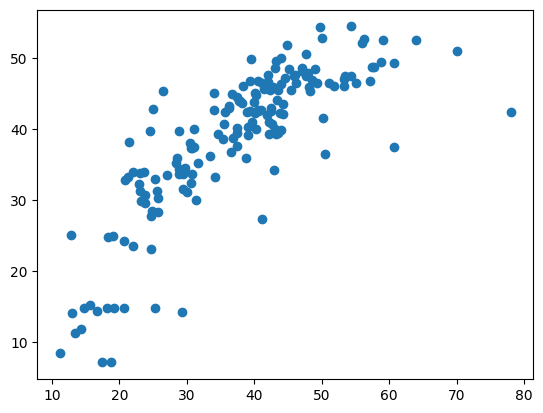

In [12]:
plt.scatter(y_test, predictions)

## Accuracy Score

In [13]:
print("Score:", lm.score(x_test, y_test))

Score: 0.64423808451217


## 64% accurate

## Examining Error

## Mean Absolute Error (MAE)

In [14]:
metrics.mean_absolute_error(y_test, predictions)

5.550201321415549

## Mean Squared Error (MSE)

In [15]:
metrics.mean_squared_error(y_test, predictions)

54.375728544922424

## Root Mean Squared Error (RMSE)

In [16]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.373990001683107

## K-Fold Cross Validation 

## Import Packages

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Goal: Ensure the most accurate and rigorous model

## Create the Folds

In [18]:
kfold = KFold(n_splits= 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print(f'train: {train}, test: {test}')

train: [  0   1   2   3   7   8   9  10  14  15  16  19  20  21  22  24  25  26
  28  30  31  32  33  34  35  36  37  38  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  60  63  64  66  68  70  71  72  74  75
  76  77  79  83  84  86  87  88  94  96  97  99 100 103 104 105 108 109
 110 111 112 113 114 115 116 118 121 123 124 126 128 129 130 131 133 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 152 153 154
 155 156 157 158 160 163 166 167 168 169 170 174 175 176 177 178 181 182
 183 184 188 190 193 194 195 196 197 198 199 200 201 202 203 205 206 208
 209 210 212 215 216 217 219 220 221 222 224 225 226 227 229 231 234 235
 236 237 239 240 241 243 246 248 249 250 251 252 253 254 255 258 259 260
 262 263 264 265 266 267 269 275 276 277 278 279 280 281 282 283 284 285
 287 288 290 293 296 297 301 302 303 305 306 307 308 309 310 313 315 316
 317 318 319 321 324 326 327 328 331 333 334 335 336 339 340 342 343 344
 345 347 349 352 353 354 355 356 357 358 359

In [19]:
print(cross_val_score(lm, x,y, cv=3))

[0.62051774 0.50393467 0.55970703]


## These models are 62%, 50%, and 56% accurate respectively. Not the best, but a great place to start.